<a href="https://www.kaggle.com/code/tomababi/nyc-restaurant-food-order-deliver-eda-analysis?scriptVersionId=117407459" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/food-ordering-and-delivery-app-dataset/food_order.csv')

In [2]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

No nan values, 1898 rows and 9 columns.

In [3]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


This shows us our numerical data. We have a good idea on average how much the order costs, how long it takes to prepare it and the amount of delivery time. 

We're left with resturant name, cuisine type and day of the week and rating. Let's check these variables out. We'll start with restaurant name. 

In [4]:
df.restaurant_name.value_counts()
df.restaurant_name.value_counts(1).head(10).sum()

0.4673340358271865

We see that we have 178 different restaurants and most orders were done on few resturants. 

The cuisine type shows us that predominantly, restaurants have american style of cooking.

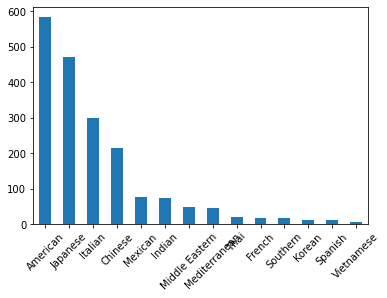

In [5]:
df.cuisine_type.value_counts()
chart = df.cuisine_type.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

Most orders are done on the weekend. 

<AxesSubplot:>

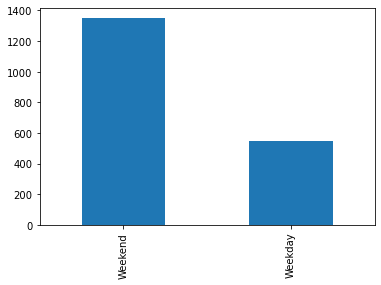

In [6]:
df.day_of_the_week.value_counts()
df.day_of_the_week.value_counts().plot(kind = 'bar')

And now the rating. We see that most orders don't recieve a rating. And those that do, mostly recieve a good rating, there isn't 1 that is lower than 3. 

<AxesSubplot:>

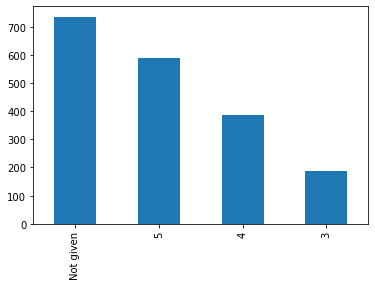

In [7]:
df.rating.value_counts().plot(kind = 'bar')

Let's explore some relationships between data. For example, do people tend to spend more money on an order if it's done on weekend or weekday. 


<AxesSubplot:xlabel='day_of_the_week'>

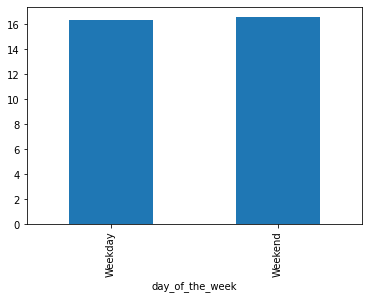

In [8]:
df.groupby('day_of_the_week')['cost_of_the_order'].mean()
df.groupby('day_of_the_week')['cost_of_the_order'].mean().plot(kind = 'bar')

We can make a quick t-test to compare the means. By looking at the mean values, we see that they are pretty similar, but we can still be sure and for exercise check the t-statistic. 

Null hypothesis: The means are not statistically different. 

In [9]:
from scipy.stats import ttest_ind

mean_wknd = df[df['day_of_the_week']  == 'Weekend']['cost_of_the_order']

mean_wkdy = df[df['day_of_the_week']  == 'Weekday']['cost_of_the_order']

ttest_ind(mean_wknd, mean_wkdy)

Ttest_indResult(statistic=0.6950418850081272, pvalue=0.48711422072696897)

The ttest shows high p-value. So we failed to reject the null hypothesis. 

What about delivery time and type of day.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='delivery_time', ylabel='count'>

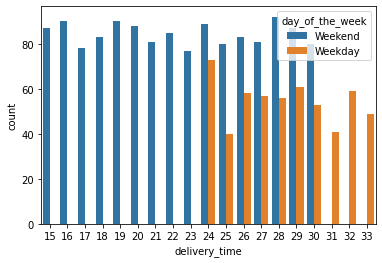

In [10]:
sns.countplot(df.delivery_time, hue = df.day_of_the_week)

Now we can see a difference. Weekdays orders are fewer  than on weekends and also take more time to deliver. 

In [11]:
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

If we check their means we can see that on weekends the deliveries tend to be almost 6 minutes faster. Is this difference statistically significant? Let's perform a ttest to see. 

Null hypothesis: The means are not statistically different. 

In [12]:
mean_wknd = df[df['day_of_the_week']  == 'Weekend']['delivery_time']

mean_wkdy = df[df['day_of_the_week']  == 'Weekday']['delivery_time']

ttest_ind(mean_wknd, mean_wkdy)

Ttest_indResult(statistic=-27.559138130580667, pvalue=6.812385861156277e-141)

We get a pvalue of over 0.05, therefore we failed to reject the null hypothesis. 

Although 6 minutes more waiting time for food when you're hungry might seem a lot, it is not statistically different. 

If we have a look at food_preparation_time, we see that it's pretty much evenly distributed. 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='food_preparation_time', ylabel='count'>

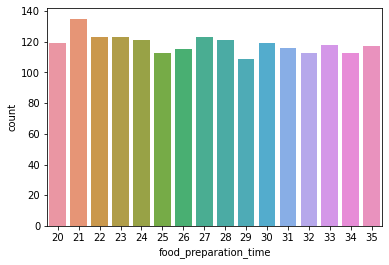

In [13]:
sns.countplot(df.food_preparation_time)

Now we'll explore relationship between cost_of_the_order and food_preparation_time. One could assume that the bigger the order( more cost) more time it would need to be prepared. 

<AxesSubplot:xlabel='food_preparation_time', ylabel='cost_of_the_order'>

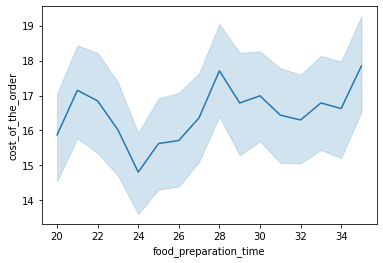

In [14]:
sns.lineplot(x = 'food_preparation_time', y = 'cost_of_the_order', data = df)

In [15]:
df.corr()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


There doesn't appear to be much of a correlation there. Barplot is a more appropriate visualization, now we can clearly see that there isn't much of a difference.

<AxesSubplot:xlabel='food_preparation_time', ylabel='cost_of_the_order'>

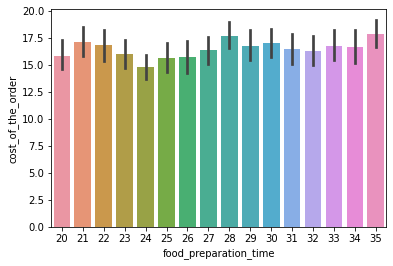

In [16]:
sns.barplot(x = 'food_preparation_time', y = 'cost_of_the_order', data = df)

If we account for different type of days, we can see a bit more variation and difference. 

day_of_the_week
Weekday    27.212066
Weekend    27.436714
Name: food_preparation_time, dtype: float64

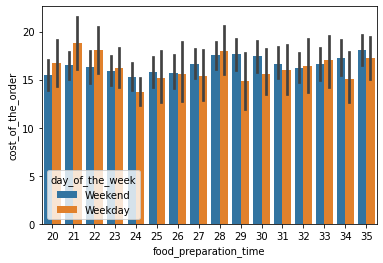

In [17]:
sns.barplot(x = 'food_preparation_time', y = 'cost_of_the_order', data = df, hue = 'day_of_the_week')
df.groupby('day_of_the_week')['food_preparation_time'].mean()

Do certain cuisines type tend to cost more than others?
Graph shows us that there might be some differences, but this could be due to the fact that not all restaurant types are equally represented in the sample. 

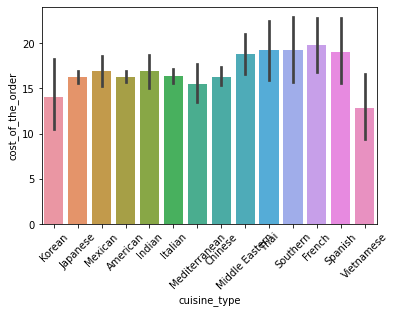

In [18]:
chart = sns.barplot(x = 'cuisine_type', y = 'cost_of_the_order',data = df)
plt.xticks(rotation = 45)
plt.show()

In [19]:
df.cuisine_type.value_counts()
df.groupby('cuisine_type')['cost_of_the_order'].mean()

df_top_r = df.cuisine_type.value_counts().head(5).index.tolist()
df_r = df.groupby('cuisine_type')['cost_of_the_order'].mean()
[df_r[cuisine] for cuisine in df_top_r]


[16.31982876712329,
 16.304531914893616,
 16.418691275167788,
 16.30520930232558,
 16.93311688311688]

We can see that all restaurants with most orders all have about the same mean. 

In [20]:
df.rating.value_counts(1)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

Let's focus on rating now. We can see that almost 40% of the data on ratings is not given. This proportion is too large to simply Impute it with mean or other methods for filling missing values. So we'll focus on the orders that receive rating. We'll subset the dataframe to consist only rows with a given rating. 

In [21]:
df_s = df[df['rating'] != 'Not given']

df_s.rating.value_counts()
df_s.rating = df_s.rating.astype('float')

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Let's take a look at which cuisine types receive best rating. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Mexican'),
  Text(1, 0, 'American'),
  Text(2, 0, 'Indian'),
  Text(3, 0, 'Mediterranean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Japanese'),
  Text(6, 0, 'Middle Eastern'),
  Text(7, 0, 'Italian'),
  Text(8, 0, 'Thai'),
  Text(9, 0, 'Southern'),
  Text(10, 0, 'Spanish'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Korean'),
  Text(13, 0, 'Vietnamese')])

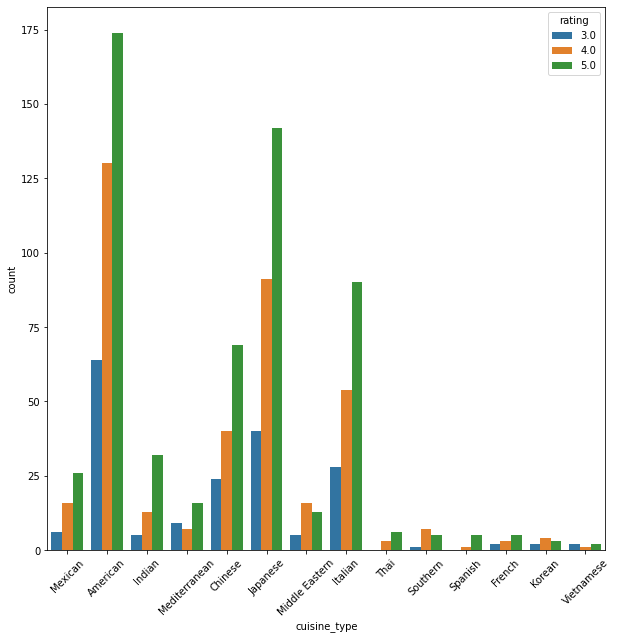

In [22]:
plt.figure(figsize = (10,10))
x = sns.countplot(x = 'cuisine_type', hue = 'rating', data = df_s)
plt.xticks(rotation = 45)

American, Japanese, Italian and Chinese cuisine types have most reviews and also the best ones. Other countries don't have as many reviews and it's hard to make an observartion, but the trend suggests that most people rate orders with 5 rating and then 4 and then 3. So overall people are usually very satisfied with their order. 

Let's look at the restaurants that receive best ratings.

In [23]:
top_r = df_s[df_s['rating'] == 5].restaurant_name.value_counts()
print(top_r.head())

Shake Shack                  60
The Meatball Shop            53
Blue Ribbon Fried Chicken    32
Blue Ribbon Sushi            32
RedFarm Broadway             18
Name: restaurant_name, dtype: int64


We see the top 5, the rest have very few reviews and most of them only have 1 5 star review. 

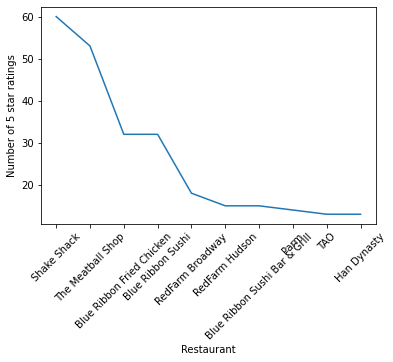

In [24]:
plt.plot(top_r.head(10))
plt.xticks(rotation = 45)
plt.ylabel('Number of 5 star ratings')
plt.xlabel('Restaurant')
plt.show()


We see that only few restaraurants have most ratings while most of them have none. Let's see if we can notice the same trend in the number of orders. 

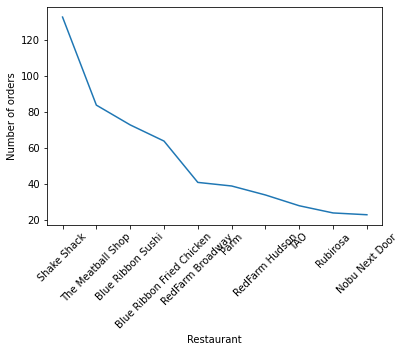

In [25]:
most_orders = df_s.restaurant_name.value_counts().head(10)
plt.plot(most_orders)
plt.xticks(rotation = 45)
plt.ylabel('Number of orders')
plt.xlabel('Restaurant')
plt.show()


We can notice a similar trend. The top restaurants get the most orders and logically more reviews. Let's look if they also have the most recurrent customers. We will be looking at all of the restaurants now, not just the 5 star rated ones. 

In [26]:
top_customer = df.customer_id.value_counts().reset_index().iloc[0:10,0]
top_r = df[df['customer_id'].isin(top_customer)]


In [27]:
top_r.restaurant_name.value_counts().head(10)


Blue Ribbon Fried Chicken        10
Blue Ribbon Sushi Izakaya         7
Bareburger                        6
Blue Ribbon Sushi Bar & Grill     6
Shake Shack                       5
Donburi-ya                        5
Sushi of Gari Tribeca             5
Five Guys Burgers and Fries       4
Benihana                          4
Parm                              3
Name: restaurant_name, dtype: int64

<AxesSubplot:>

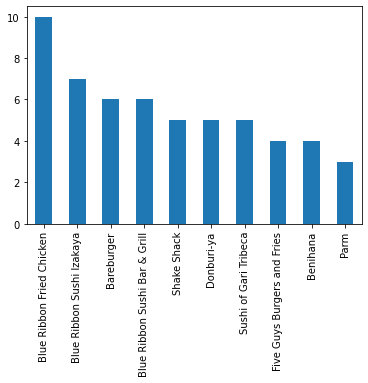

In [28]:
top_r.restaurant_name.value_counts().head(10).plot(kind = 'bar')

We see that not all restaurants who have the most recurrent orders recieve the highest ratings. This could be due to the fact that you rarely see a person giving a 5 star review every single time he/she orders food. And also the fact that 40% of customers don't give reviews at all. 

What we can conclude from this analysis is that restaurants are a lot busier on weekends and are more prepared for that. We can see that with delivery times as the average delivery time is 6 minutes longer for weekdays. The average order cost is around 16 dollars and it takes about 50 minutes to arrive (food preparation time + delivery time).

Almost 50% of orders are done by 10 restaurants, meanwhile we have 178 restaurants total. So the distribution of orders is really skewed. Other restaurants might not have that many deliveries because they are busy with serving people that come to the restaurant. Or it could be that other restaurants serve such type of food that is hard to get for a take away. If we take for example most popular cuisine types, we see American, Japanese, Chinese and Italian. Everyone loves burgers and pizza for example so it's no wonder these types of food will be ordered more.  